In [1]:
import pandas as pd

In [145]:
origin = "/home/thiemcun/"
file_full_name_path = origin + "The-Mr.-or-Ms.-Dilemma-Can-You-Guess-Them-All/GenderPrediction/dataset/name_full.csv"
df_full_name = pd.read_csv(file_full_name_path) # full name
df_full_name

,Full_Name,Gender
0,Ngô Xuân Tùng,1
1,Bùi Dương Thảo Vy,0
2,Lưu Thế Huy,1
3,Nguyễn Thị Vân,0
4,Dương Minh Long,1
...,...,...
26846,Đoàn Thị Bảo Thu,0
26847,Ôn Hoa Thu,1
26848,Nguyễn Thị Huỳnh Như,0
26849,Nguyễn Thị Hồng Phúc,0


In [146]:
data = {"Full_Name":[], "Gender":[]}

for fname, gender in zip(df_full_name["Full_Name"], df_full_name["Gender"]):
    fname_lst = fname.split()
    if len(fname_lst) > 1:
        fn = " ".join([word.strip() for word in fname_lst])
        data["Full_Name"].append(fn.lower())
        data["Gender"].append(gender)
  
df1 = pd.DataFrame(data)
df1 = df1.drop_duplicates()
print('number of duplicate names', len(df_full_name) - len(df1))

number of duplicate names 5676


In [143]:
ddf = df_full_name.drop_duplicates() # without lowercase name

In [144]:
print('number of duplicate names', len(df_full_name) - len(ddf))

number of duplicate names 5631


In [3]:
last_name_file_path = origin + "The-Mr.-or-Ms.-Dilemma-Can-You-Guess-Them-All/GenderPrediction/dataset/last_name_full.csv"
df_last_name = pd.read_csv(last_name_file_path)
df_last_name

,Last_Name,Gender
0,Ngô,1
1,Bùi,0
2,Lưu,1
3,Nguyễn,0
4,Dương,1
...,...,...
26845,Đoàn,0
26846,Ôn,1
26847,Nguyễn,0
26848,Nguyễn,0


In [4]:
first_name_file_path = origin + "The-Mr.-or-Ms.-Dilemma-Can-You-Guess-Them-All/GenderPrediction/dataset/first_name_full.csv"
df_first_name = pd.read_csv(first_name_file_path)
df_first_name

,First_Name,Gender
0,Tùng,1
1,Vy,0
2,Huy,1
3,Vân,0
4,Long,1
...,...,...
26842,Thu,0
26843,Thu,1
26844,Như,0
26845,Phúc,0


In [73]:
middle_name_file_path = origin + "The-Mr.-or-Ms.-Dilemma-Can-You-Guess-Them-All/GenderPrediction/dataset/middle_name_full.csv"
df_middle_name = pd.read_csv(middle_name_file_path)
df_middle_name[:40]

,Middle_Name,Gender
0,Xuân,1
1,Dương Thảo,0
2,Thế,1
3,Thị,0
4,Minh,1
5,Mai,0
6,Thị Hồng,0
7,Hoàng,1
8,Ngọc,1
9,Anh,1


In [122]:
gender = df_full_name["Gender"]
female = 0
male = 0
for g in gender:
    if g == 0:
        female += 1
    else:
        male += 1
        
sex = ["male", "female"]
no = [male, female]

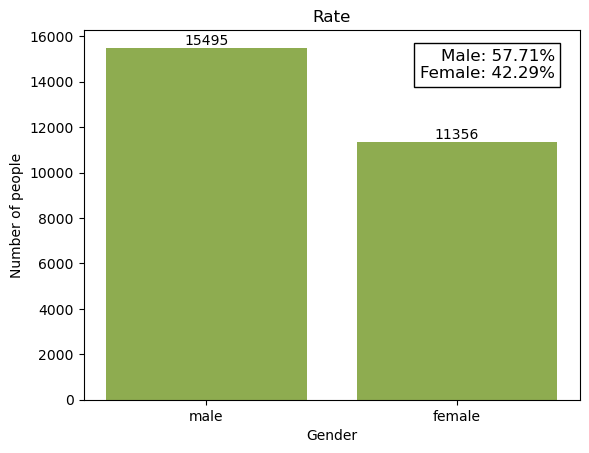

In [135]:
import matplotlib.pyplot as plt
plt.xlabel('Gender')
plt.ylabel('Number of people')
plt.title('Rate')
plt.bar(sex, no, color = "#8EAC50")
# Add value labels on top of the bars
for i in range(len(no)):
    plt.text(i, no[i], str(no[i]), ha='center', va='bottom')
    
total = sum(no)
percent_male = (male / total) * 100
percent_female = (female / total) * 100

# Add legend with percentage information
text_box = f"Male: {percent_male:.2f}%\nFemale: {percent_female:.2f}%"
plt.text(0.95, 0.95, text_box, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=1))

plt.show()

## first name analysis

In [284]:
first_freq = dict()
male_first_freq = dict()
female_first_freq = dict()
name = df_first_name["First_Name"]
gender = df_first_name["Gender"]
for n, g in zip(name, gender):
    if g == 0:
        if n not in female_first_freq:
            female_first_freq[n]=1
        else:
            female_first_freq[n]+=1
    if g == 1 :
        if n not in male_first_freq:
            male_first_freq[n]=1
        else:
            male_first_freq[n]+=1
    if n not in first_freq:
            first_freq[n]=1
    if n in first_freq:
            first_freq[n]+=1


In [285]:
s= 0
for i in name:
    if i == "Ngộ": print(s)
    s+=1
        

18849
19998


confused name

In [102]:
female_first_freq_set= set(female_first_freq)
male_first_freq_set = set(male_first_freq)
same = male_first_freq_set.intersection(female_first_freq_set)
# print(s)

In [282]:
confused = dict()
for name in same:
    rate =   male_first_freq[name]/female_first_freq[name]
    # if 0.1< rate <1.9:
    confused[name] = rate
    if name ==  "Ngộ": print(male_first_freq[name],female_first_freq[name])


1 1


In [186]:
import math
def p(x):
    return x*math.e**(-x**2/(2*std**2))/std**2


1.6770814504817014e-05

1.007723757975585 1.016668354332536


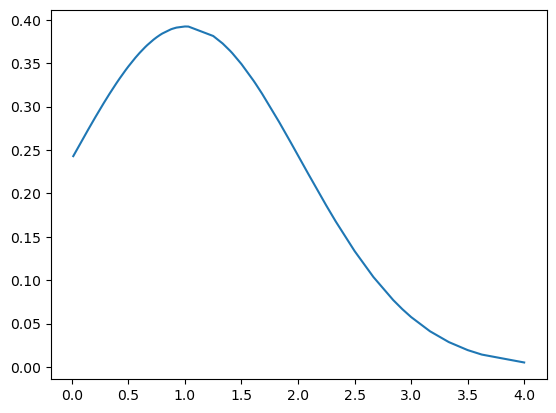

In [271]:
x = [i for i in confused.values()]
x.sort()
x_sort = x[:267]
mean = np.mean(x_sort)
std_dev = np.std(x_sort)
print(mean, std)
from scipy.stats import norm
x_values = [str(xi) for xi in x]
y = [ norm.pdf(xi, mean, std_dev) for xi in x_sort]
plt.plot(x_sort,y)
plt.show()
# print(y)

0.3923902678051308


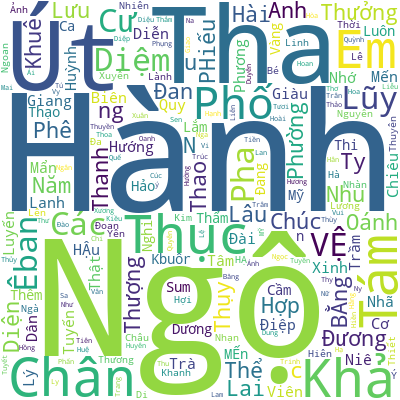

In [278]:
from wordcloud import WordCloud
import random
from PIL import Image
image_width = 400
image_height = 400
confused_dict = dict()
lst = list(confused.items())
lst.sort(key = lambda x: x[1], reverse = False)
# print(lst)
s = -100000
for i in lst[:267]:
    confused_dict[i[0]] = norm.pdf(i[1],mean, std_dev)
    if s <= confused_dict[i[0]]:
        s= confused_dict[i[0]]
print(s)
    # print(confused_dict[i])
# confused_dict = confused_dict.items()

word_cloud = WordCloud(width=image_width, height=image_height,background_color='white').generate_from_frequencies(confused_dict)


# Generate the image
image = word_cloud.to_image()
# Show the image
image.show()


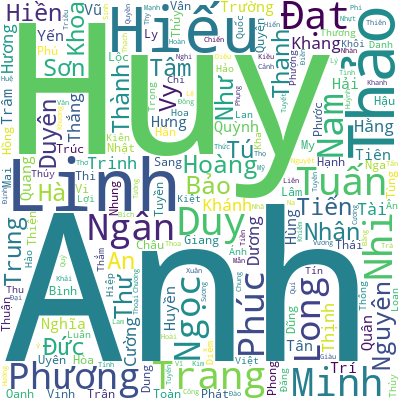

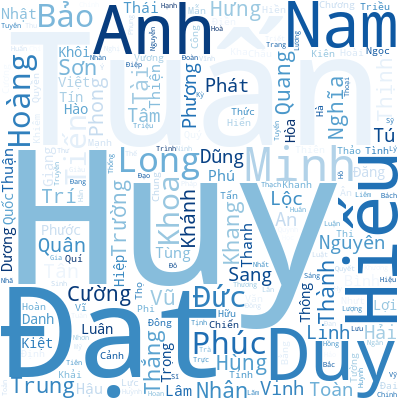

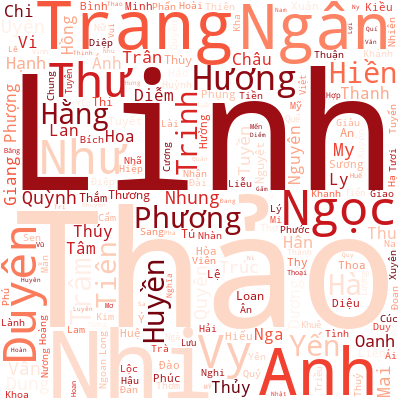

In [30]:
from wordcloud import WordCloud
import random
from PIL import Image
image_width = 400
image_height = 400
#FULL
from wordcloud import WordCloud
import random
from PIL import Image

# Set the size of the image
image_width = 400
image_height = 400
# Generate the word cloud with the color function
word_cloud = WordCloud(width=image_width, height=image_height, background_color='white').generate_from_frequencies(first_freq)
# Generate the image
image = word_cloud.to_image()
# Show the image
image.show()


#MALE
word_cloud = WordCloud(width=image_width, height=image_height,background_color='white', colormap = 'Blues').generate_from_frequencies(male_first_freq)
# Generate the image
image = word_cloud.to_image()
# Show the image
image.show()

#FEMALE
word_cloud = WordCloud(width=image_width, height=image_height,background_color='white', colormap = 'Reds').generate_from_frequencies(female_first_freq)
# Generate the image
image = word_cloud.to_image()
# Show the image
image.show()

## Last name analysis

In [33]:
last_freq = dict()
male_last_freq = dict()
female_last_freq = dict()
name = df_last_name["Last_Name"]
gender = df_last_name["Gender"]
for n, g in zip(name, gender):
    if g == 0:
        if n not in female_last_freq:
            female_last_freq[n]=1
        else:
            female_last_freq[n]+=1
    if g == 1 :
        if n not in male_last_freq:
            male_last_freq[n]=1
        else:
            male_last_freq[n]+=1
    if n not in last_freq:
            last_freq[n]=1
    if n in last_freq:
            last_freq[n]+=1


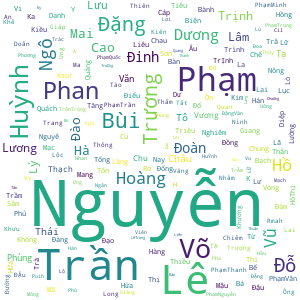

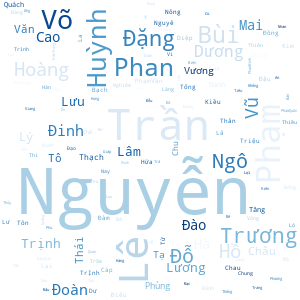

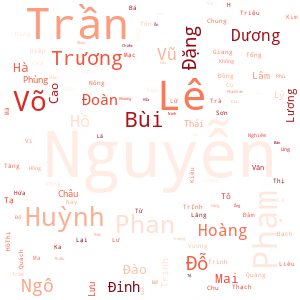

In [38]:
from wordcloud import WordCloud
import random
from PIL import Image
image_width = 300
image_height = 300
#FULL
from wordcloud import WordCloud
import random
from PIL import Image


# Generate the word cloud with the color function
word_cloud = WordCloud(width=image_width, height=image_height, background_color='white').generate_from_frequencies(last_freq)
# Generate the image
image = word_cloud.to_image()
# Show the image
image.show()


#MALE
word_cloud = WordCloud(width=image_width, height=image_height,background_color='white', colormap = 'Blues').generate_from_frequencies(male_last_freq)
# Generate the image
image = word_cloud.to_image()
# Show the image
image.show()

#FEMALE
word_cloud = WordCloud(width=image_width, height=image_height,background_color='white', colormap = 'Reds').generate_from_frequencies(female_last_freq)
# Generate the image
image = word_cloud.to_image()
# Show the image
image.show()

## Middle Name Analysis

In [92]:
middle_freq = dict()
male_middle_freq = dict()
female_middle_freq = dict()
name = df_middle_name["Middle_Name"]
gender = df_middle_name["Gender"]
s= 0
for n, g in zip(name, gender):
    if g == 0:
        if n not in female_middle_freq:
            female_middle_freq[n]=1
        else:
            female_middle_freq[n]+=1
    elif g == 1 :
        if n not in male_middle_freq:
            male_middle_freq[n]=1
        else:

            male_middle_freq[n]+=1
    if n not in middle_freq:
            middle_freq[n] = 1
    if n in middle_freq: 
            middle_freq[n]+=1
    s+=1

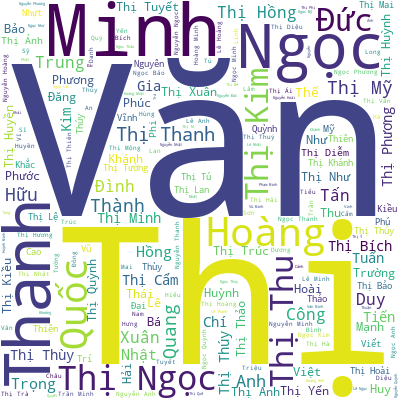

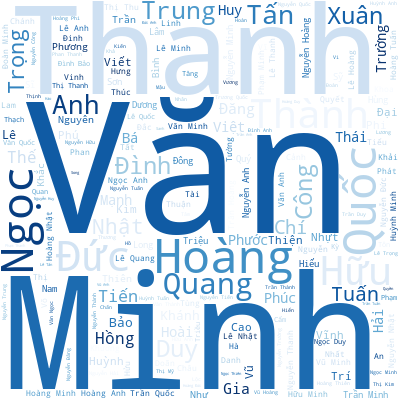

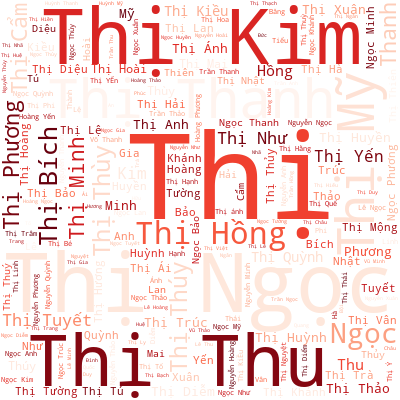

In [93]:
from wordcloud import WordCloud
import random
from PIL import Image
image_width = 400
image_height = 400
#FULL
from wordcloud import WordCloud
import random
from PIL import Image


# Generate the word cloud with the color function
word_cloud = WordCloud(width=image_width, height=image_height, background_color='white').generate_from_frequencies(middle_freq)
# Generate the image
image = word_cloud.to_image()
# Show the image
image.show()


#MALE
word_cloud = WordCloud(width=image_width, height=image_height,background_color='white', colormap = 'Blues').generate_from_frequencies(male_middle_freq)
# Generate the image
image = word_cloud.to_image()
# Show the image
image.show()

#FEMALE
word_cloud = WordCloud(width=image_width, height=image_height,background_color='white', colormap = 'Reds').generate_from_frequencies(female_middle_freq)
# Generate the image
image = word_cloud.to_image()
# Show the image
image.show()